# KNN para el conjunto de datos de Cáncer de mama de Scikit Learn sin estandarización

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar los datos de scikit learn
Scikit Learn devuelve diccionarios

In [2]:
from sklearn.datasets import load_breast_cancer

Obtenemos el diccionario

In [3]:
cancer = load_breast_cancer()

Claves del diccionario

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Podemos obtener información del diccionario

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

### Crear DataFrame a partir del diccionario

In [7]:
cancer_df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


DataFrame para el target

In [9]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [10]:
df = cancer_df.join(df_target)

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df['Cancer'].value_counts()

1    357
0    212
Name: Cancer, dtype: int64

1 representa a Benigno (357 casos)

0 representa a Maligno (212 casos)

## Tarea

Crea un modelo KNN para el conjunto de datos de cáncer de mama

a) Sin estandarización

b) Con estandarización

## División en conjunto de entrenamiento y prueba

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Cancer'],axis=1)
y = df['Cancer']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=100)

## Uso de KNN (K vecinos más cercanos)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

## Predicciones y Evaluaciones

¡Evaluemos nuestro modelo KNN!

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))

[[ 60   9]
 [  2 100]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        69
           1       0.92      0.98      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



## Elección del valor de K

Avancemos y usemos el método del codo para elegir un buen valor de K:

In [23]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

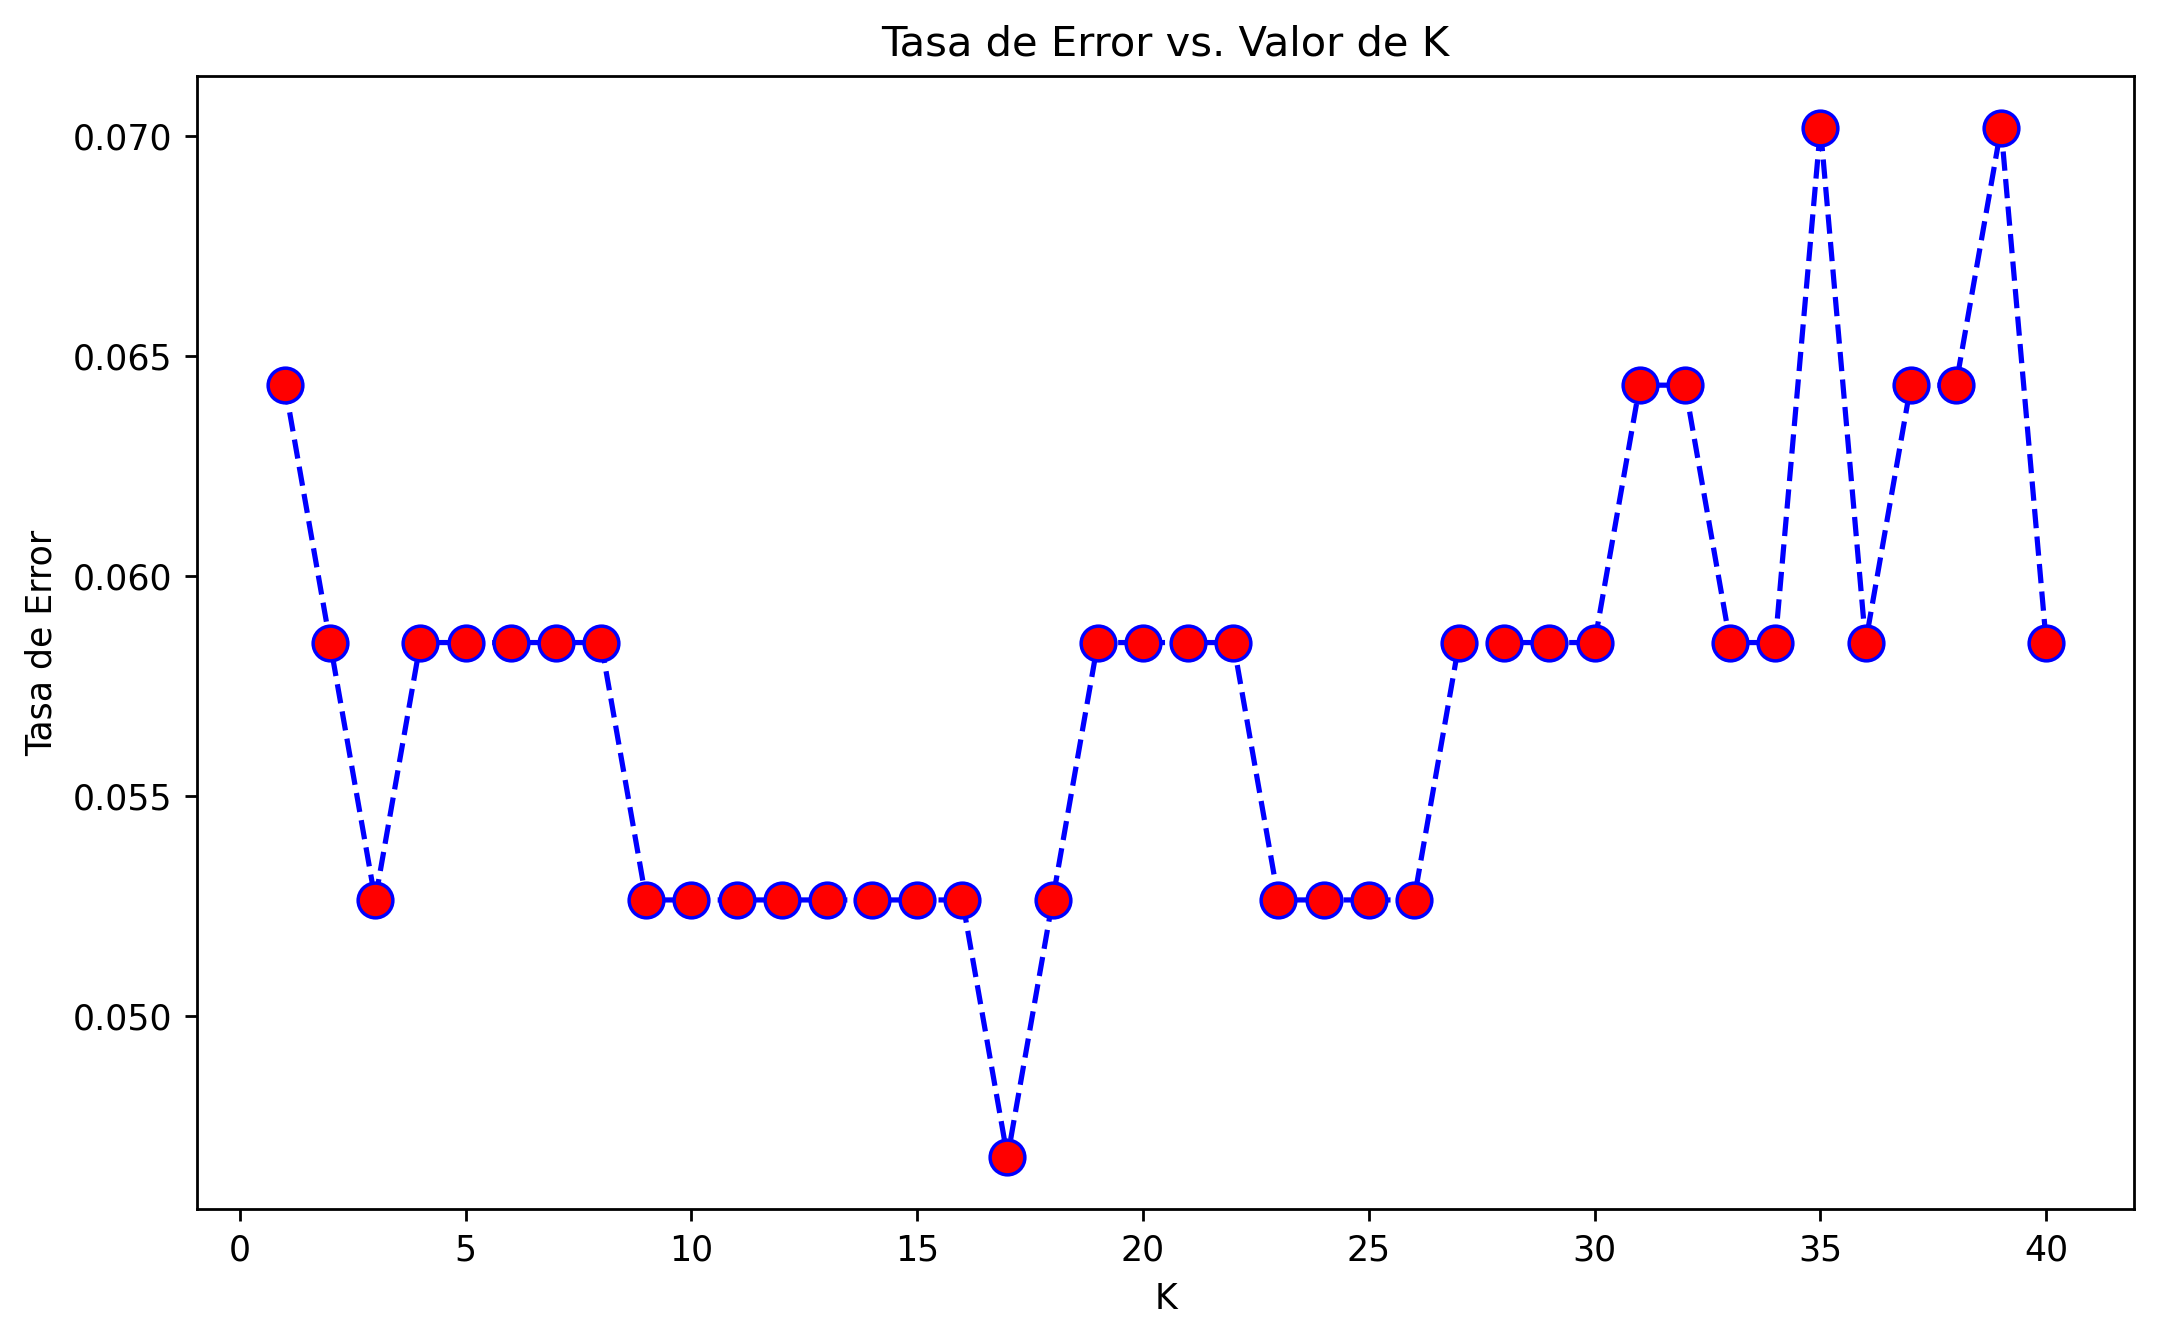

In [24]:
plt.figure(figsize=(10,6),dpi=250)
plt.plot(range(1,41),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Aquí podemos ver que después de aplicar K>17, la tasa de error tiende a rondar los 0.05-0.04. Reentrenemos el modelo con este dato y verifiquemos el informe de clasificación

In [25]:
# PRIMERO UNA COMPARACIÓN RÁPIDA CON EL K=1 ORIGINAL
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=1


[[ 60   9]
 [  2 100]]


              precision    recall  f1-score   support

           0       0.97      0.87      0.92        69
           1       0.92      0.98      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [26]:
# AHORA CON K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=17


[[64  5]
 [ 3 99]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.95      0.97      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



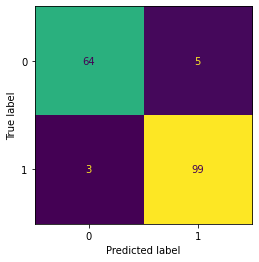

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,colorbar=False)

## Evaluación con Curva ROC y Curva Precision-Recall

In [28]:
from sklearn.metrics import plot_roc_curve

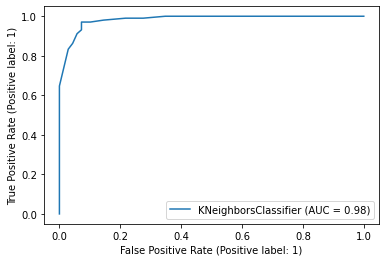

In [29]:
plot_roc_curve(knn,X_test,y_test)

In [30]:
from sklearn.metrics import plot_precision_recall_curve

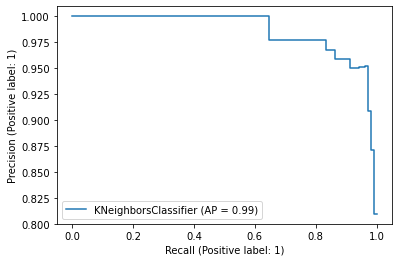

In [31]:
plot_precision_recall_curve(knn,X_test,y_test)